# Download and merge dataset

We need to download and merge dataset from the following [link](https://docs.google.com/spreadsheets/d/1uvkYbuASv6i-zJgJQuhu4_8fLDbbRaJfO84DCQCgq-U/edit#gid=0).

In [1]:
import requests
import geopandas as gpd
import pandas as pd
import geojson
import zipfile
import os
import shutil
import urllib, json
import pprint
import requests
import descartes
from requests.adapters import HTTPAdapter 
import operator
%matplotlib inline

# Define the data structure

In [13]:
data_t2=[
    {
        'information_type':'forest_concession',
        'iso3':'CMR',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/ebeea54f498f40439d6e7f4b5a2ba7a2_172.geojson',
             'table':'table1',
             'join_Key':'nom_conces',
             'join_table':'table2'},#table 2
            {'url':'https://opendata.arcgis.com/datasets/663ea4a1220e4b2a82a54b1fc616a32e_131.geojson',
             'table':'table2',
             'join_Key':'nom_conces',
             'join_table':'table1'}],#table 1
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':'nrc_ste',
            'capital_origin':None,
            'fmu_name':'nom_foret',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':None,
            'certification_type':'t_cert_af & t_cert_leg',
            'certification_date':'d_cert_af & d_cert_leg respectively',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'forest_concession',
        'iso3':'COD',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/b45c429a250c4142973bc665fb95fbc2_31.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':None,
            'company_FAID':None,
            'capital_origin':'orig_capit',
            'fmu_name':'num_ccf',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':'date_echea',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':'statu_cert',
            'certification_type':'type_cert',
            'certification_date':'date_cert',
            'certification_date_due':'dat_ech_ce',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Ventes de coupe',
        'iso3':'CMR',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/63623b2d634e4214962aef52699291a3_136.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None},
            {'url':'https://opendata.arcgis.com/datasets/833d7c931b7741b087257596de8232d0_160.geojson',
             'table':'table2',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':'nrc_ste',
            'capital_origin':None,
            'fmu_name':'nom_vc',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':'date_expr',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':None,
            'ccf_status':None,
            'm_plan_status':None,
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':None,
            'certification_type':None,
            'certification_date':None,
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'forest_concession',
        'iso3':'COG',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/1643a4bb843d4fc996ae69474f1a49dd_77.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'concessionsnom_ste',
            'Contractor_name':None,
            'company_FAID':'societenrc_ste',
            'capital_origin':'societeorig_capit',
            'fmu_name':'concessionsnom_con',
            'fmu_type':'concessionstype_',
            'start_date':'concessionsdate_attri',
            'end_date':'concessionsdate_echea',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'concessionstype_conv',
            'validation_date':'concessionsdate_amgt',
            'ccf_status':None,
            'm_plan_status':'concessionsstatu_amgt',
            'num_ccf':None,
            'open_year':'concessionsan_deb_ex',
            'close_year':'concessionsperio_rota',
            'last_update':'concessionslast_edited_date',
            'certification_status':None,
            'certification_type':'concessionstype_cert',
            'certification_date':'concessionsdate_cert',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'forest_concession',
        'iso3':'GAB',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/807969a8335b44a8a30f6e1b9325cc9d_7.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'nom_titul',
            'Contractor_name':None,
            'company_FAID':None,
            'capital_origin':'orig_ca',
            'fmu_name':None,
            'fmu_type':'type_',
            'start_date':'date_sign',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':None,
            'ccf_status':None,
            'm_plan_status':None,
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'date_revis',
            'certification_status':'statu_cert',
            'certification_type':'type_cert',
            'certification_date':None,
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'forest_concession',
        'iso3':'CAF',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/5a6ceeec32cb4e189f7aaa6c3f19d4c7_0.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':None,
            'capital_origin':None,
            'fmu_name':'num_permis',
            'fmu_type':None,
            'start_date':'date_attr',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':None,
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edi_1',
            'certification_status':None,
            'certification_type':'cert_amgt',
            'certification_date':'date_cert',
            'iso3_fmu':None,
            'geometries':'shape'}
    }
    
]

# Define the functions

In [3]:
def concat(gdfs,parm):
    output=pd.concat(gdfs,sort=parm)
    return output

In [4]:
def ensure_dir(f):
    '''
    Ensures the existance of a path (f) before using it 
    '''
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.mkdir(d)

In [5]:
def unique_vals(listObj, property):
    '''
    This script will get unique vals from a dictionary property across a list of dicts.
    '''
    used = set()
    return [item[property] for item in listObj if item[property] not in used and (used.add(item[property]) or True)]

In [6]:

def data_merge(forest_concessions):  
    '''
    We need to update this function. At the moment we are not using it on the final code.
    '''
    response = []
    for concessions in forest_concessions:
        nullcolumns = [k  for k, v in concessions['columns_select_rename'].items() if v == None]
        for column in nullcolumns:
            if 'data' in concessions.keys():
                tmp = concessions['data']
                concessions['data']={**tmp}
            concessions['data'][column]=None
        concessions['data']['iso3_fmu']=concessions['iso3']
        concessions['data'].rename(columns={v: k  for k, v in concessions['columns_select_rename'].items() if v != None}, inplace=True)
        response.append(concessions['data'][list(concessions['columns_selection'])])
    return pd.concat(response)

In [7]:
def zipDir(path, ziph):
    '''
    We need to update this function. At the moment we are not using it on the final code.
    '''
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

In [8]:
def request(url):
    '''
    This function makes a request to an url and generates a geojson with the data
    '''
    try:
        with requests.Session() as s:
            s.mount( 'http://' , HTTPAdapter(max_retries= 3 ))
            s.mount( 'https://' , HTTPAdapter(max_retries= 3 )) 
            r =  s.get(url)
    except:
        print(f"call to {url} exited with estatus {r.status_code}" )
        raise r.status_code
    geodata=geojson.loads(geojson.dumps(r.json()))
    return geodata

# Main code

In [22]:
outdir = '/home/jovyan/work/datasets/fti/otp'
ensure_dir(outdir)
response=[]
for data in data_t2:
    '''
    Function that downloads and generates a data structure
    '''  
    print(data['iso3'])
    if len(data['urls'])==1:# If the information comes just from one url
        print(f"{data['information_type']}")
        el = data['urls'][0]
        #print(f"{el['url']}")
        geodata=request(el['url'])
        if geodata.get('features'):#checks that geodata has features associated and fills data in data-structure
            data['data']=gpd.GeoDataFrame.from_features(geodata, crs = {'init':'epsg:4326'})
            data['columns']=data['data'].columns.values
        #print(data['data'])
        else:#populates the data structure by extracting the info from the geodataframe
            df = pd.dataframe(geodata)
            data['data']=gpd.GeoDataFrame(df, geometry=None, crs = {'init':'epsg:4326'})
            data['columns']=data['data'].columns.values
    
    elif len(data['urls'])>1:# if the info comes from multiple tables
        jtables = [table['join_table'] for table in data['urls']]
        jtables_count=[{x:jtables.count(x)} for x in set(jtables)]
        for y in jtables_count:
            for k,v in y.items():
                for el in data['urls']:
                    if el['join_table']==k:
                        el.update({'Count':v})
        list_sorted = sorted(data['urls'], key=lambda k: k['Count'], reverse=True) # sort the list by the highest count to the lowest
        #print(list_sorted)
        # list sorted: contains the info contained in the data structure, sorted from the hightes count to the lowest
        
        if list_sorted[0]['join_Key']!=None:# if the tables have a join key to merge the data with
            # this code can be improved by adding recursive functions but works so far
            list_geodata_toMerge=[request(e['url']) for e in list_sorted]
            list_gdfs_toMerge=[gpd.GeoDataFrame.from_features(geodata, crs = {'init':'epsg:4326'}) for geodata in list_geodata_toMerge]
            list_geometry=[gdf.get('geometry') for gdf in list_gdfs_toMerge]
            geometry=list_geometry[1]# We will need to write a function to obtain automatically the geometry
            #print(geometry)
            key=list_sorted[(len(list_sorted)-2)]['join_Key']
            gdf1=list_gdfs_toMerge[-1]
            gdf2=list_gdfs_toMerge[(len(list_sorted)-2)]
            temp_merge=gdf1.merge(gdf2,on=key,how='inner')       
            if len(list_sorted)==2:
                gdf_merged=temp_merge
            else:
                for i in (reversed(range(len(list_gdfs_toMerge)-2))):
                    key_merge=list_sorted[i]['join_Key']
                    gdf_merged=temp_merge.merge(list_gdfs_toMerge[i],on=key_merge,how='inner')
        
            
            gdf_merged_geometry=gpd.GeoDataFrame(gdf_merged, geometry=geometry, crs = {'init':'epsg:4326'})#generates a geodataframe from the data merged
            
            geodata_tomerge=[request(e['url']) for e in list_sorted]
            for gdata in geodata_tomerge:# populates the data structure by extracting the info from the merged geodataframe
                if gdata.get('features', None):
                    data['data']=gdf_merged_geometry
                    data['columns']=data['data'].columns.values
                else:
                    df = pd.dataframe(gdata)
                    data['data']=gpd.GeoDataFrame(df, geometry=None, crs = {'init':'epsg:4326'})
                    data['columns']=data['data'].columns.values
           
        elif list_sorted[0]['join_Key']==None:# concatenates geodataframes with no join key in common
            list_gdfs_toConcat=[gpd.GeoDataFrame.from_features(request(el['url']).get('features'),crs={'init':'epsg:4326'}) for el in list_sorted]
            dfs_concat=concat(list_gdfs_toConcat,True)
            geodata_toconcat=[request(e['url']) for e in list_sorted]
            for gdata in geodata_toconcat:# populates the data structure by extracting the info from the merged geodataframe
                if gdata.get('features',None):
                    data['data']=dfs_concat
                    data['columns']=data['data'].columns.values
                else:
                    df = pd.dataframe(gdata)
                    data['data']=gpd.GeoDataFrame(df, geometry=None, crs = {'init':'epsg:4326'})
                    data['columns']=data['data'].columns.values
            
    concessions = data['data']  
    if concessions.empty:
        print(f"Concessions: is empty")
        #print(data['columns_select_rename'])
    nullcolumns=[v for k,v in data['columns_select_rename'].items()]
    diff_cols = set(nullcolumns) - set(data['columns'])
    print(f"cols that are not in our data: {diff_cols}")
    concessions['iso3_fmu'] = data['iso3']# renames the columns
    concessions.rename(columns={v: k  for k, v in data['columns_select_rename'].items() if v != None}, inplace=True)
    response.append(concessions.loc[:,data['columns_selection']])
    
try:#concat all the info to reponse and expor the data as a shapefile which is manually uploaded to mapshaper to simplify the geometry and export as json file
    outFile=pd.concat(response)
    fileName = data['information_type'] + '.shp'
    outFile.to_file(f'{outdir}/{fileName}', driver='ESRI Shapefile')
    print(outdir+fileName)
    with zipfile.ZipFile('data.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
            zipDir(f'{outdir}/{fileName}', zipf)
except Exception as error:
    print(error)    

CMR
cols that are not in our data: {'last_edited_date', 'd_cert_af & d_cert_leg respectively', 'type_', 'shape', 'nrc_ste', None, 't_cert_af & t_cert_leg', 'desc_type'}
COD
Forest Concessions Agreeent


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


cols that are not in our data: {None, 'shape'}
CMR
cols that are not in our data: {None, 'shape'}
COG
Concessions forestieres 1
cols that are not in our data: {None, 'shape'}
GAB
Concessions forestieres 2
cols that are not in our data: {None, 'shape'}
CAF
Permiss d explotation et d amenagement
cols that are not in our data: {None, 'shape'}
/home/jovyan/work/datasets/fti/otpPermiss d explotation et d amenagement.shp


# Test merging tables manually

[{'url': 'https://opendata.arcgis.com/datasets/ebeea54f498f40439d6e7f4b5a2ba7a2_172.geojson', 'table': 'table1', 'join_Key': 'nom_conces', 'join_table': 'table3'}, {'url': 'https://opendata.arcgis.com/datasets/833d7c931b7741b087257596de8232d0_160.geojson', 'table': 'table2', 'join_Key': 'globalid', 'join_table': 'table1'}, {'url': 'https://opendata.arcgis.com/datasets/663ea4a1220e4b2a82a54b1fc616a32e_131.geojson', 'table': 'table3', 'join_Key': 'nom_conces', 'join_table': 'table1'}]


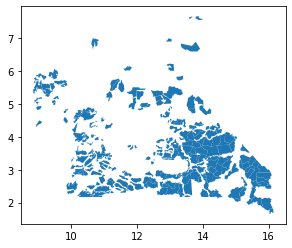

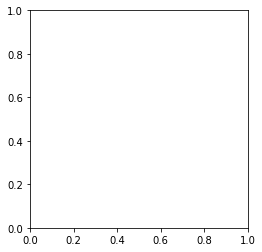

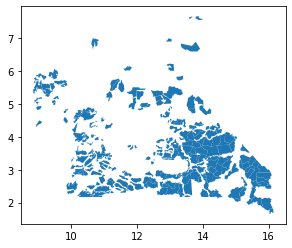

In [9]:
'''
Test the merge code and generates the geodataframe manually selecting the geometry.
'''
test = data_t2[0]['urls']
print(test)
geodata1=request('https://opendata.arcgis.com/datasets/663ea4a1220e4b2a82a54b1fc616a32e_131.geojson')
geodata2=request('https://opendata.arcgis.com/datasets/ebeea54f498f40439d6e7f4b5a2ba7a2_172.geojson')

gdf1=gpd.GeoDataFrame.from_features(geodata1.get('features'),crs={'init':'epsg:4326'})
gdf2=gpd.GeoDataFrame.from_features(geodata2.get('features'),crs={'init':'epsg:4326'})

gdf1.plot()
gdf2.plot()

df_merged=gdf1.merge(gdf2, on='nom_conces',how='inner')

geometry=gdf1.get('geometry')


godataframe=gpd.GeoDataFrame(df_merged, geometry=geometry, crs = {'init':'epsg:4326'})
godataframe.plot()


In [ ]:
for data in data_t2:
    if len(data['urls'])>1:
        jtables = [table['join_table'] for table in data['urls']]
        jtables_count=[{x:jtables.count(x)} for x in set(jtables)]
        for y in jtables_count:
            for k,v in y.items():
                for el in data['urls']:
                    if el['join_table']==k:
                        el.update({'Count':v})
        list_sorted = sorted(data['urls'], key=lambda k: k['Count'], reverse=True) # sort the list by the highest count to the lowest
        
        if list_sorted[0]['join_Key']!=None:
            geodata_tomerge=[]
            gdfs_tomerge=[]
            geometry_tomerge=[]
            geodata_list=[request(element['url']) for element in list_sorted]
            geodataframes=[gpd.GeoDataFrame.from_features(geodata, crs = {'init':'epsg:4326'}) for geodata in geodata_list]
            geometry=[gdf.get('geometry') for gdf in geodataframes]
            gdf1=geodataframes[-1]
            gdf2=geodataframes[1]
            df_merged=gdf1.merge(gdf2,on='nom_conces',how='inner')
            gdf_merged=gpd.GeoDataFrame(df_merged, geometry=geometry[1], crs = {'init':'epsg:4326'})
            gdf_merged.plot()
            

# New file

In [5]:
New_csv=pd.read_csv('test_1-1_MV.csv')

In [6]:
New_df=pd.DataFrame(New_csv)

In [14]:
New_df['TO BE DELETED'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: TO BE DELETED, dtype: object

In [15]:
is_x =  New_df['TO BE DELETED']=='X'

In [19]:
Filter_df = New_df[is_x]

In [20]:
Filter_df

,TO BE DELETED,company_na,Contractor,company_FA,capital_or,fmu_name,fmu_type,start_date,end_date,sawmills,...,m_plan_sta,num_ccf,open_year,close_year,last_updat,certificat,certific_1,certific_2,iso3_fmu,geometries
256,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-08-09T00:00:00.000Z,NaN,NaN,NaN,CAF,NaN
257,X,THANRY,THANRY,NaN,NaN,NaN,NaN,1996-05-29T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
258,X,IFB,IFB,NaN,NaN,NaN,NaN,1994-08-24T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,FSC,NaN,CAF,NaN
259,X,IFB,IFB,NaN,NaN,NaN,NaN,1996-03-07T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
260,X,SCAD,SCAD,NaN,NaN,NaN,NaN,1996-03-07T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
261,X,SEFCA,SEFCA,NaN,NaN,NaN,NaN,1998-07-17T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
262,X,SOFOKAD,SOFOKAD,NaN,NaN,NaN,NaN,1999-01-15T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
263,X,SEFCA,SEFCA,NaN,NaN,NaN,NaN,2004-02-12T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
264,X,VICA,VICA,NaN,NaN,NaN,NaN,2004-02-12T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN
265,X,IFB,IFB,NaN,NaN,NaN,NaN,2007-04-06T00:00:00.000Z,NaN,NaN,...,amenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAF,NaN


In [34]:
Filter_df.to_csv('/Users/elena_palao/Projectos/OTP/layers_todelete.csv')